In [5]:
import pandas as pd
from matplotlib.pyplot import figure, savefig, show, subplots
import os
import math
#dfa = pd.read_csv("./gpt3.5-zeroshot.csv", sep=';')
#print(dfa['Original'].value_counts()['1'])

def aux(param):
    if type(param) == str:
        return int(param)
    if math.isnan(param):
        return param
    return int(param)
    
file_tag = "notes"

dic = {}
directory = "../"
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            df = pd.read_csv(file.path, sep=';')
            #print(df['Notes'].value_counts())
            
            if 'theoretical' in df['Notes'].unique():
                theo = df['Notes'].value_counts()['theoretical']
            else:
                theo = 0
                
            if 'non-interesting' in df['Notes'].unique():
                non_inter = df['Notes'].value_counts()['non-interesting']
            else:
                non_inter = 0
            
            easy = df['Notes'].value_counts()['too easy']
            
            print(file.name)
            print(theo)
            print(non_inter)
            print(easy)
            dic[file.name[:-4]] = {'Theoretical': theo, 'Too easy': easy, 'Non-interesting': non_inter}


gpt3.5-finetuned.csv
0
0
6
mistral-zeroshot.csv
2
27
2
gpt3.5-zeroshot.csv
10
9
3
mistral-finetuned.csv
2
16
13
final-model.csv
0
1
17


{'Theoretical': [0, 2, 10, 2, 0], 'Too easy': [6, 2, 3, 13, 17], 'Non-interesting': [0, 27, 9, 16, 1]}


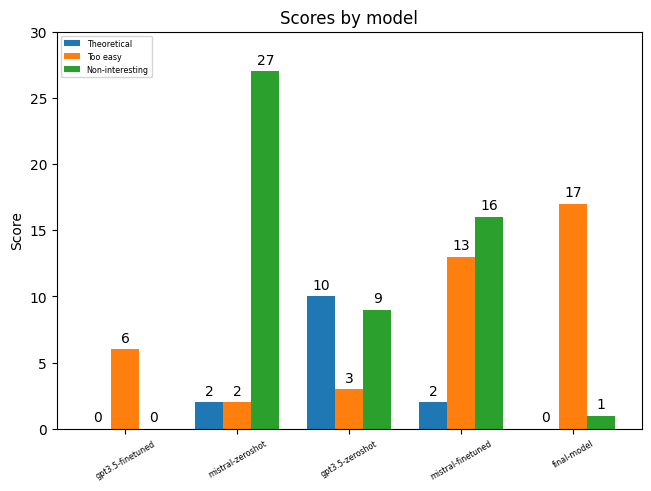

In [16]:
import numpy as np
import matplotlib.pyplot as plt
models = []   
results = {'Theoretical': [], 'Too easy': [], 'Non-interesting': []}
for key in dic:
    models.append(key)
    results['Theoretical'].append(round(dic[key]['Theoretical'],2))
    results['Too easy'].append(round(dic[key]['Too easy'],2))
    results['Non-interesting'].append(round(dic[key]['Non-interesting'],2))
print(results)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3,fontsize=10)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by model')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 30)
ax.tick_params(axis="x", labelrotation=30, labelsize="xx-small")


savefig(f"../../thesisplots/{file_tag}.png", bbox_inches='tight')